<a href="https://colab.research.google.com/github/Project-4-Trends-and-Insights-Database/Projeto_Dados_para_abastecer_o_carro/blob/main/Projeto_Dados_para_abastecer_o_carro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 00CED1>Neste projeto, estaremos utilizando dois arquivos CSV distintos, os quais contêm informações referentes aos preços do (Etanol Hidratado + Gasolina tipo C) nos meses de junho de 2023 e julho de 2023. Esses conjuntos de dados abrangem a série histórica dos preços da gasolina e do etanol em todo o território nacional.

## <font color = 00CED1>Vamos carregar os conjuntos de dados "preços-gasolina-etanol-06.csv" e "preços-gasolina-etanol-07.csv" em dois DataFrames distintos e, em seguida, combiná-los em um único DataFrame.

# <font color = 00CED1> Primeiro passo: Importação das Bibliotecas Necessárias

### Importar bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carregar os dados dos arquivos CSV

In [ ]:
# URLs dos arquivos CSV no GitHub
url_mes6 = 'https://raw.githubusercontent.com/Project-4-Trends-and-Insights-Database/Projeto_Dados_para_abastecer_o_carro/main/arquivos%20csv/precos-gasolina-etanol-06.csv'
url_mes7 = 'https://raw.githubusercontent.com/Project-4-Trends-and-Insights-Database/Projeto_Dados_para_abastecer_o_carro/main/arquivos%20csv/precos-gasolina-etanol-07.csv'

# Carregando os dados em DataFrames
dados_mes6 = pd.read_csv(url_mes6, sep=';')
dados_mes7 = pd.read_csv(url_mes7, sep=';')


### Definir a função de limpeza de valores numéricos

In [ ]:
def clean_numeric_value(value):
    if isinstance(value, str):
        # Remover vírgulas
        value = value.replace(',', '')
        # Substituir vírgulas por pontos nos valores decimais
        value = value.replace('.', '', value.count('.') - 1)
    try:
        return float(value)
    except:
        return np.nan

### Aplicar a função de limpeza aos DataFrames

In [ ]:
dados_mes6['Valor de Venda'] = dados_mes6['Valor de Venda'].apply(clean_numeric_value)
dados_mes7['Valor de Venda'] = dados_mes7['Valor de Venda'].apply(clean_numeric_value)

# <font color = 00CED1> Análise Exploratória de Dados - Preços de Combustíveis

In [ ]:
print("Colunas do mês 6:")
print(dados_mes6.columns)

print("\nColunas do mês 7:")
print(dados_mes7.columns)


Colunas do mês 6:
Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')

Colunas do mês 7:
Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')


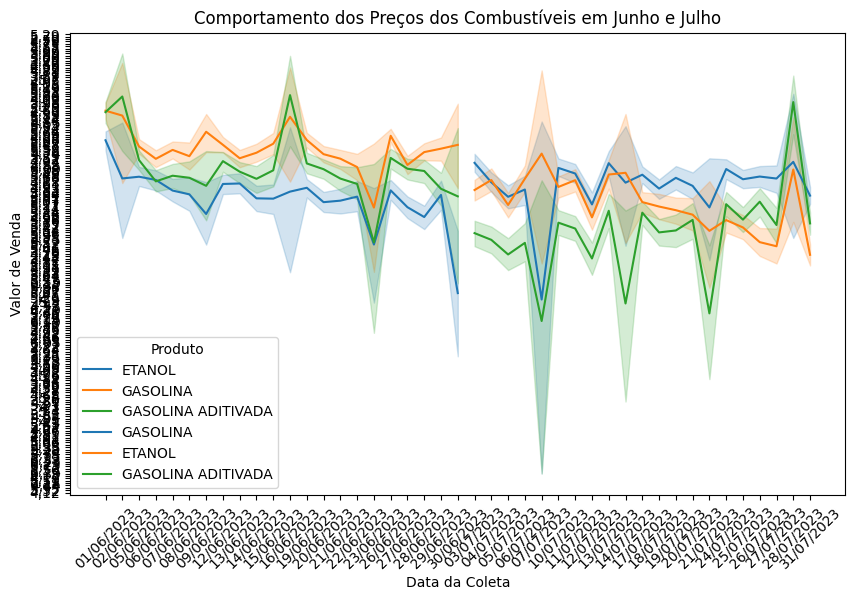

In [ ]:
# 1. Como se comportaram o preço dos combustíveis durante os dois meses?
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_mes6, x='Data da Coleta', y='Valor de Venda', hue='Produto')
sns.lineplot(data=dados_mes7, x='Data da Coleta', y='Valor de Venda', hue='Produto')
plt.title('Comportamento dos Preços dos Combustíveis em Junho e Julho')
plt.xlabel('Data da Coleta')
plt.ylabel('Valor de Venda')
plt.legend(title='Produto')
plt.xticks(rotation=45)
plt.show()



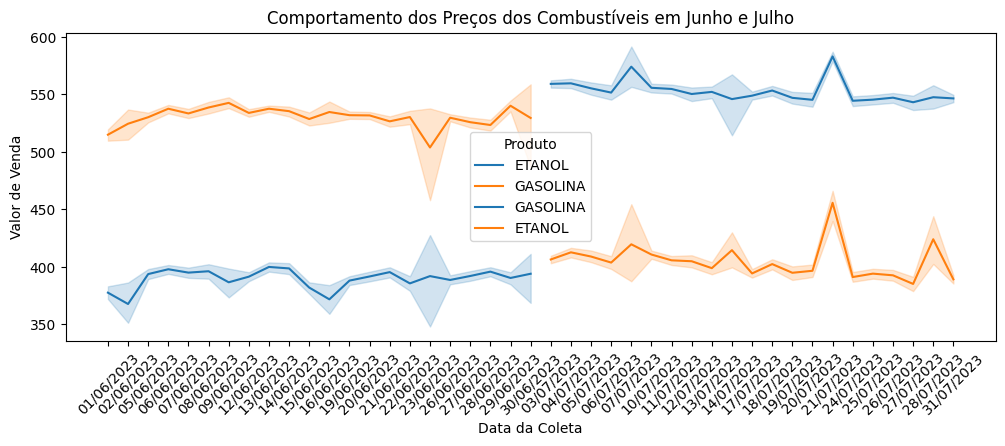

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os dados para incluir apenas gasolina e etanol
dados_mes6_filtrados = dados_mes6[dados_mes6['Produto'].isin(['GASOLINA', 'ETANOL'])]
dados_mes7_filtrados = dados_mes7[dados_mes7['Produto'].isin(['GASOLINA', 'ETANOL'])]

plt.figure(figsize=(12, 4))
sns.lineplot(data=dados_mes6_filtrados, x='Data da Coleta', y='Valor de Venda', hue='Produto')
sns.lineplot(data=dados_mes7_filtrados, x='Data da Coleta', y='Valor de Venda', hue='Produto')
plt.title('Comportamento dos Preços dos Combustíveis em Junho e Julho')
plt.xlabel('Data da Coleta')
plt.ylabel('Valor de Venda')
plt.legend(title='Produto')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 2. Qual o preço médio da gasolina e do etanol nesses dois meses?
preco_medio_mes6 = dados_mes6.groupby('Produto')['Valor de Venda'].mean()
preco_medio_mes7 = dados_mes7.groupby('Produto')['Valor de Venda'].mean()



In [ ]:
# 3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
preco_medio_estado_mes6 = dados_mes6.groupby(['Estado - Sigla', 'Produto'])['Valor de Venda'].mean().reset_index()
preco_medio_estado_mes7 = dados_mes7.groupby(['Estado - Sigla', 'Produto'])['Valor de Venda'].mean().reset_index()


In [ ]:

# 4. Qual o preço médio da gasolina e do etanol por estado?
preco_medio_estado_mes6_pivot = preco_medio_estado_mes6.pivot(index='Estado - Sigla', columns='Produto', values='Valor de Venda')
preco_medio_estado_mes7_pivot = preco_medio_estado_mes7.pivot(index='Estado - Sigla', columns='Produto', values='Valor de Venda')



In [ ]:

# 5. Qual o município que possui o menor preço para a gasolina e para o etanol?
preco_municipio_mes6 = dados_mes6.groupby(['Municipio', 'Produto'])['Valor de Venda'].min()
preco_municipio_mes7 = dados_mes7.groupby(['Municipio', 'Produto'])['Valor de Venda'].min()




In [ ]:
# 6. Qual o município que possui o maior preço para a gasolina e para o etanol?
preco_municipio_max_mes6 = dados_mes6.groupby(['Municipio', 'Produto'])['Valor de Venda'].max()
preco_municipio_max_mes7 = dados_mes7.groupby(['Municipio', 'Produto'])['Valor de Venda'].max()


In [ ]:
# 7. Qual a região que possui o maior valor médio da gasolina?
preco_medio_regiao_mes6 = dados_mes6.groupby(['Regiao - Sigla', 'Produto'])['Valor de Venda'].mean().reset_index()
preco_medio_regiao_mes7 = dados_mes7.groupby(['Regiao - Sigla', 'Produto'])['Valor de Venda'].mean().reset_index()


In [ ]:
# 8. Qual a região que possui o menor valor médio do etanol?
preco_medio_regiao_etanol_mes6 = preco_medio_regiao_mes6[preco_medio_regiao_mes6['Produto'] == 'ETANOL']
preco_medio_regiao_etanol_mes7 = preco_medio_regiao_mes7[preco_medio_regiao_mes7['Produto'] == 'ETANOL']



In [ ]:
# 9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
correlacao_regiao_mes6 = preco_medio_regiao_mes6.pivot(index='Regiao - Sigla', columns='Produto', values='Valor de Venda')
correlacao_regiao_mes7 = preco_medio_regiao_mes7.pivot(index='Regiao - Sigla', columns='Produto', values='Valor de Venda')


In [ ]:
# 10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?
correlacao_bandeira_mes6 = dados_mes6.groupby(['Bandeira', 'Produto'])['Valor de Venda'].mean().reset_index()
correlacao_bandeira_mes7 = dados_mes7.groupby(['Bandeira', 'Produto'])['Valor de Venda'].mean().reset_index()


In [ ]:
# Apresentação dos resultados em gráficos, tabelas, etc.

# Respostas para as perguntas
print("Respostas para as perguntas do projeto:")
print("1. Como se comportaram os preços dos combustíveis durante os dois meses?")
# Análise realizada no gráfico anterior.

print("\n2. Qual o preço médio da gasolina e do etanol nesses dois meses?")
print("Mês 6:")
print(preco_medio_mes6)
print("\nMês 7:")
print(preco_medio_mes7)

print("\n3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?")
print("Mês 6:")
print(preco_medio_estado_mes6.sort_values(by='Valor de Venda', ascending=False).head(5))
print("\nMês 7:")
print(preco_medio_estado_mes7.sort_values(by='Valor de Venda', ascending=False).head(5))

print("\n4. Qual o preço médio da gasolina e do etanol por estado?")
print("Mês 6:")
print(preco_medio_estado_mes6_pivot)
print("\nMês 7:")
print(preco_medio_estado_mes7_pivot)

print("\n5. Qual o município que possui o menor preço para a gasolina e para o etanol?")
print("Mês 6:")
print(preco_municipio_mes6)
print("\nMês 7:")
print(preco_municipio_mes7)

print("\n6. Qual o município que possui o maior preço para a gasolina e para o etanol?")
print("Mês 6:")
print(preco_municipio_max_mes6)
print("\nMês 7:")
print(preco_municipio_max_mes7)

print("\n7. Qual a região que possui o maior valor médio da gasolina?")
print("Mês 6:")
print(preco_medio_regiao_mes6[preco_medio_regiao_mes6['Produto'] == 'GASOLINA'].sort_values(by='Valor de Venda', ascending=False).head(1))
print("\nMês 7:")
print(preco_medio_regiao_mes7[preco_medio_regiao_mes7['Produto'] == 'GASOLINA'].sort_values(by='Valor de Venda', ascending=False).head(1))

print("\n8. Qual a região que possui o menor valor médio do etanol?")
print("Mês 6:")
print(preco_medio_regiao_etanol_mes6.sort_values(by='Valor de Venda').head(1))
print("\nMês 7:")
print(preco_medio_regiao_etanol_mes7.sort_values(by='Valor de Venda').head(1))


Respostas para as perguntas do projeto:
1. Como se comportaram os preços dos combustíveis durante os dois meses?

2. Qual o preço médio da gasolina e do etanol nesses dois meses?
Mês 6:
Produto
ETANOL                392.328460
GASOLINA              531.514021
GASOLINA ADITIVADA    546.303253
Name: Valor de Venda, dtype: float64

Mês 7:
Produto
ETANOL                399.630123
GASOLINA              550.857150
GASOLINA ADITIVADA    567.515462
Name: Valor de Venda, dtype: float64

3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
Mês 6:
   Estado - Sigla             Produto  Valor de Venda
8              AM  GASOLINA ADITIVADA      609.736842
7              AM            GASOLINA      597.004149
2              AC  GASOLINA ADITIVADA      592.224138
61             RO            GASOLINA      582.265823
59             RN  GASOLINA ADITIVADA      576.635838

Mês 7:
   Estado - Sigla             Produto  Valor de Venda
8              AM  GASOLINA ADITIVADA      638.9

In [ ]:
# Verificar valores ausentes nos DataFrames
print("Valores ausentes no mês 6:")
print(dados_mes6.isnull().sum())

print("\nValores ausentes no mês 7:")
print(dados_mes7.isnull().sum())


Valores ausentes no mês 6:
Regiao - Sigla           0
Estado - Sigla           0
Municipio                0
Revenda                  0
CNPJ da Revenda          0
Nome da Rua              0
Numero Rua              18
Complemento          38193
Bairro                 106
Cep                      0
Produto                  0
Data da Coleta           0
Valor de Venda           0
Valor de Compra      49041
Unidade de Medida        0
Bandeira                 0
dtype: int64

Valores ausentes no mês 7:
Regiao - Sigla           0
Estado - Sigla           0
Municipio                0
Revenda                  0
CNPJ da Revenda          0
Nome da Rua              0
Numero Rua              20
Complemento          42394
Bairro                 118
Cep                      0
Produto                  0
Data da Coleta           0
Valor de Venda           0
Valor de Compra      54515
Unidade de Medida        0
Bandeira                 0
dtype: int64


In [ ]:
# Remover duplicatas dos DataFrames
dados_mes6 = dados_mes6.drop_duplicates()
dados_mes7 = dados_mes7.drop_duplicates()
